## Detecting faces in an image

In [8]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

%matplotlib inline
 
image_path = "C:/Git/FaceRec-Samples/Sample_Images/gafa.jpg"
image_file = open( image_path, 'rb' )

#### Calling face detect api

In [9]:
import requests

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<Subscription Key>"

face_api_url = 'https://brazilsouth.api.cognitive.microsoft.com/face/v1.0/detect'

headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type' : 'application/octet-stream'}

response = requests.post( face_api_url, headers = headers, data = image_file )

faces = response.json()

top = faces[0]["faceRectangle"]["top"]
left = faces[0]["faceRectangle"]["left"]
width = faces[0]["faceRectangle"]["width"]
height = faces[0]["faceRectangle"]["height"]

print( 'top = ', top, 'left = ', left, 'width = ', width, 'height =', height )

('top = ', 56, 'left = ', 100, 'width = ', 39, 'height =', 39)


#### Displaying the original image and overlay it with the face boundingbox

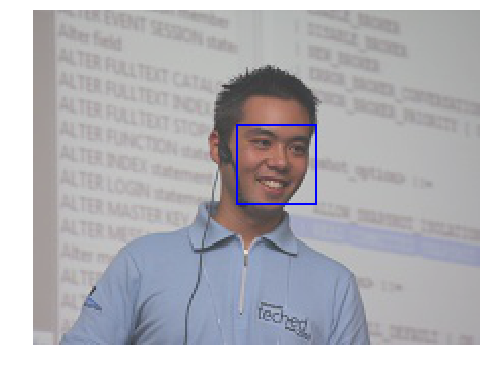

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patches

image = Image.open( image_path )

plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.8)
for face in faces:
    fr = face["faceRectangle"]
    origin = (left, top)
    p = patches.Rectangle(origin, width, height, fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")

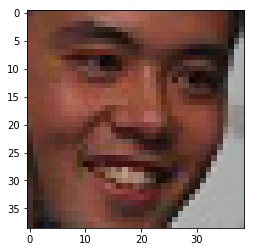

In [11]:
bottom = left + width 
right = top + height

area = ( left, top, bottom, right )
cropped_img = image.crop(area)

imshow( np.asarray(cropped_img) )

#### References

[Quickstart: Detect faces in an image using Python](https://docs.microsoft.com/pt-br/azure/cognitive-services/face/quickstarts/python)